In [1]:
#this will examine the price fluctuations of a few specific products... 
#and then look to generalise the price movements for all products
# final step will be to combine price and products to see the correlation

In [2]:
#load the data, add a few key variables, reduce to a specific product
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import pixiedust as pix
dateCols = ['date']
train2=pd.read_csv("/home/cdsw/train_plus_not_imputted.csv",parse_dates=dateCols)
train2["TotalRevenue"]=train2.item_cnt_day*train2.item_price
train2["Month"]=train2.date.dt.month
train2["Year"]=train2.date.dt.year
train2['YM'] = train2['Year']*100+train2["Month"]

#create an average per month - see how it changes
sales_per_item_PM= train2.groupby(['item_id','YM'])['item_cnt_day',"TotalRevenue" ].sum().reset_index()
sales_per_item_PM["AvPrice"]=sales_per_item_PM.TotalRevenue/sales_per_item_PM.item_cnt_day

#for later so can look at volume change over time against the product
sales_perM= sales_per_item_PM.pivot_table(index=["item_id"],columns="YM",values="item_cnt_day", fill_value=0).reset_index() 

Pixiedust database opened successfully


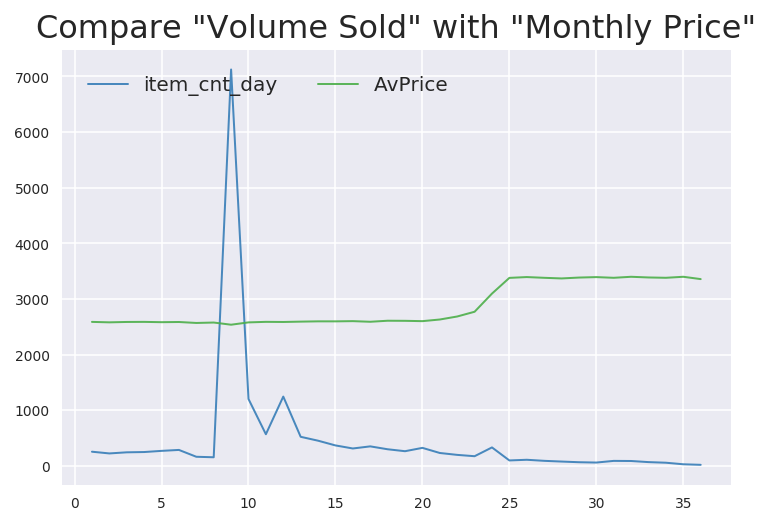

In [13]:
it_3732=sales_per_item_PM[sales_per_item_PM.item_id==3732].drop(["item_id","TotalRevenue"],axis=1)
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in it_3732.drop('YM', axis=1):
    num+=1
    plt.plot(range(1,37), it_3732[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
    # Add legend
    plt.legend(loc=2, ncol=2)
plt.title('Compare "Volume Sold" with "Monthly Price"', fontsize=16)
plt.show()



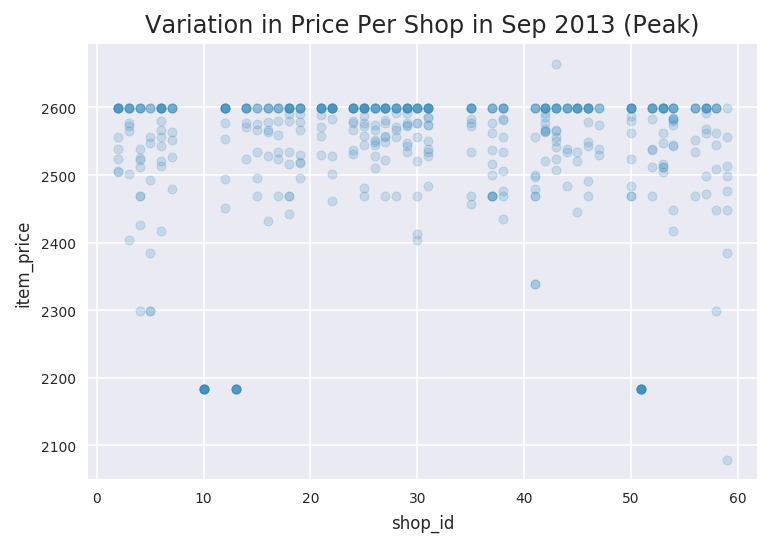

In [14]:
#look at the price for one product per shop in 201309 as that's the peak
scat=train2[(train2.item_id==3732) & (train2.YM==201309)]
scat.plot(kind="scatter",x="shop_id",y="item_price", alpha=0.2)
plt.title('Variation in Price Per Shop in Sep 2013 (Peak)', fontsize=12)


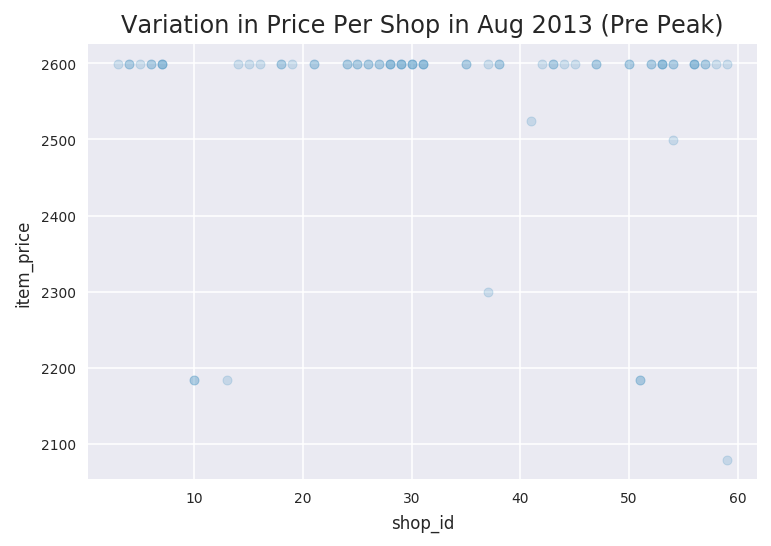

In [15]:
#how was the variation before
scat_pre=train2[(train2.item_id==3732) & (train2.YM==201308)]
scat_pre.plot(kind="scatter",x="shop_id",y="item_price", alpha=0.2)
plt.title('Variation in Price Per Shop in Aug 2013 (Pre Peak)', fontsize=12)

In [6]:
#this shows that there was almost no variation in the price in the pre spike month and then quite a lot of variation when spike happened
#how much was sold in 201309 where price matched the median in 201308
med=train2.item_price[(train2.YM==201308) &(train2.item_id==3732)].median()
print("Number sold in 201309 where price was same as 2018:",
      train2.item_cnt_day[(train2.item_price== med ) & (train2.item_id==3732)& (train2.YM==201309)].sum())

print("Number sold in 201308:", train2.item_cnt_day[(train2.YM==201308) &(train2.item_id==3732)].sum())

Number sold in 201309 where price was same as 2018: 1067.0
Number sold in 201308: 154.0


In [7]:
#so this says that actually the variation in month drives the sales... even where its the same price as last month

#how do some of the other prior months look - consistency makes theory true? or looks inconclusive?

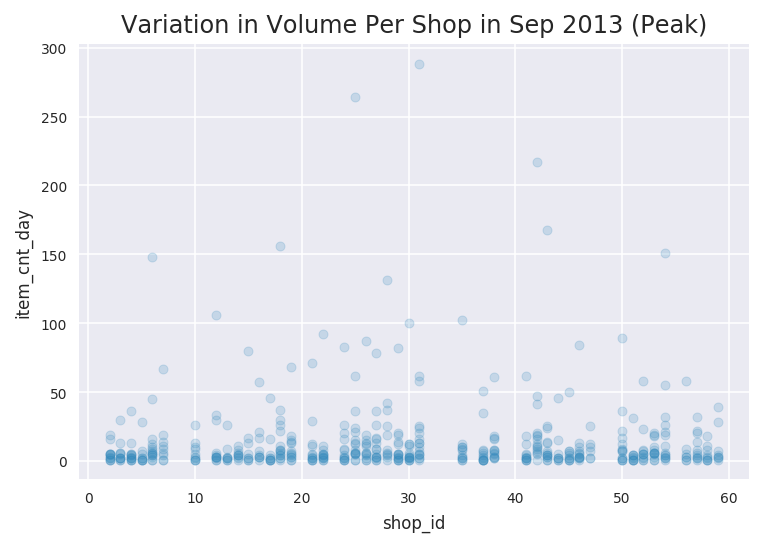

In [16]:
#this needs to be changed so get better understanding of the volumes - maybe grouped version
scat.plot(kind="scatter", x="shop_id",y="item_cnt_day", alpha=0.2)
plt.title('Variation in Volume Per Shop in Sep 2013 (Peak)', fontsize=12)


In [ ]:
#wanted to see the volume really changing but hard to see

In [57]:
#check if the variation is random, run subsplots for 36 months for any given product
def scat_months(df,prod):
     
    """Print scatter for all months as sub plots of any given product"""

    # Initialize the figure
    plt.style.use('seaborn-darkgrid')

    # create a color palette
    palette = plt.get_cmap('Set1')
    
    uniq=sorted(set(train2.YM))[0:9]
    # multiple line plot
    num=0
    for period in uniq:
        df2=df[(df["YM"]==period) & (df["item_id"]==prod)]
        num+=1

        # Find the right spot on the plot
        plt.subplot(3,3, num)

        # Plot the lineplot
        df2.plot(kind="scatter",x="shop_id",y="item_price", color=palette(num), label=period,alpha=0.2)
        

In [72]:
def scat_months2(df,prod):
    """Print scatter for all months as sub plots of any given product"""
    uniq=sorted(set(train2.YM))[0:9]
    fig, axes = plt.subplots(3, 3, figsize=(6, 4), sharex=True, sharey=True)
    for period in uniq:
        df[(df["YM"]==period) & (df["item_id"]==prod)].plot(x='shop_id',
                y='item_price',
                kind='scatter',
                label=period,alpha=0.2)

    fig.tight_layout()

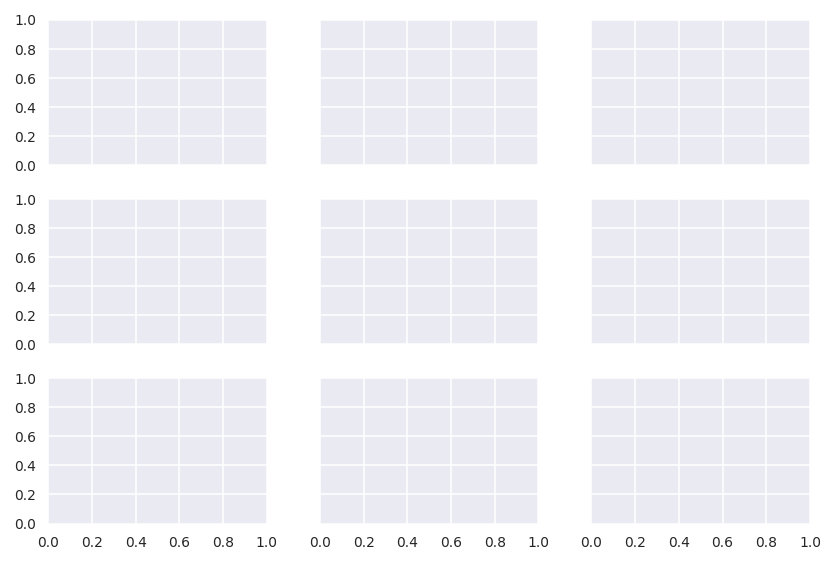

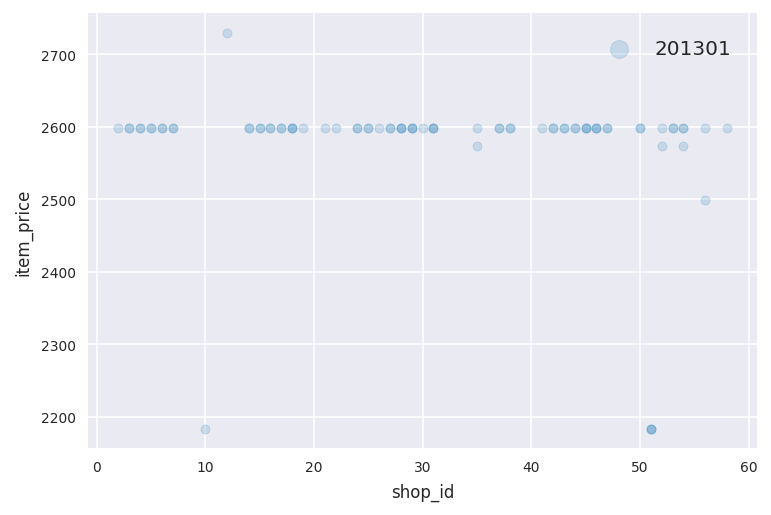

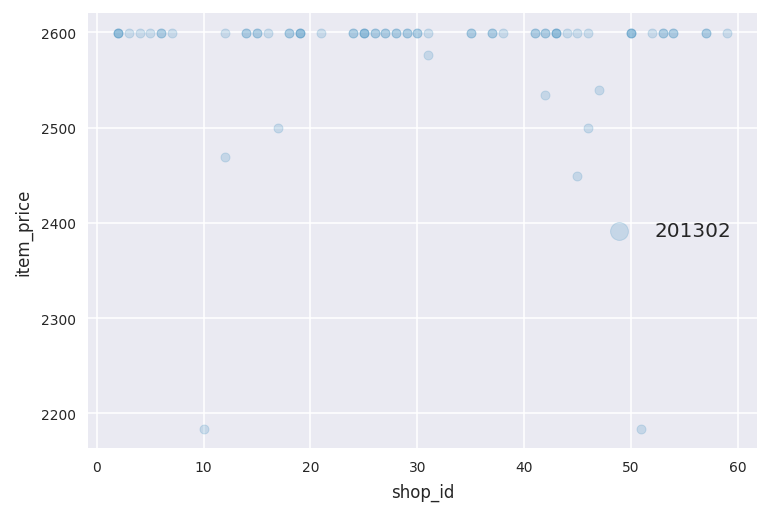

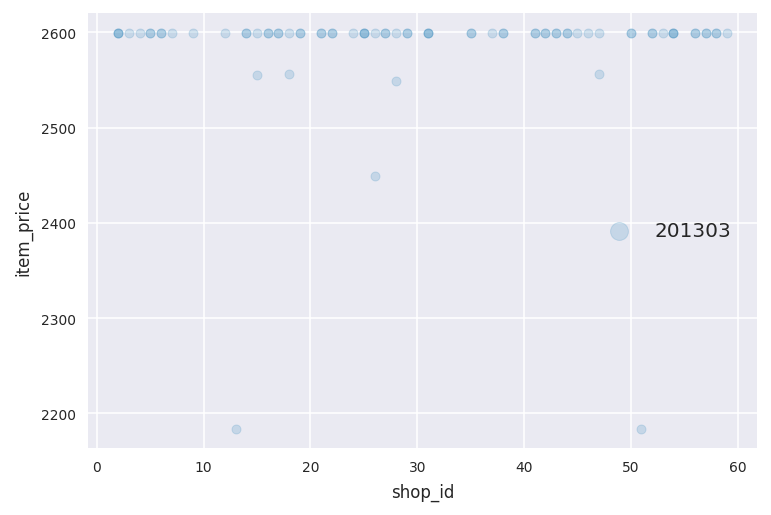

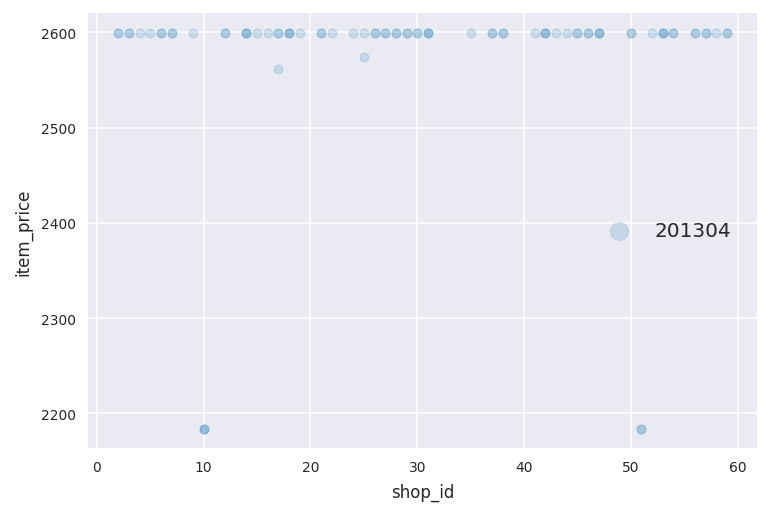

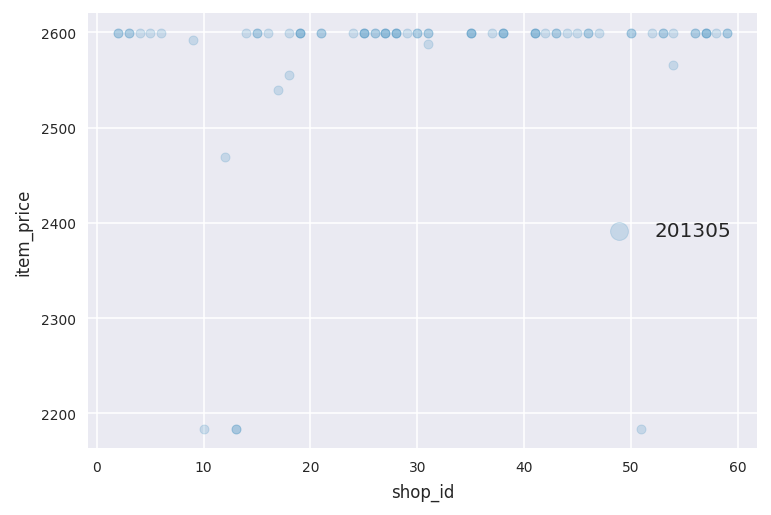

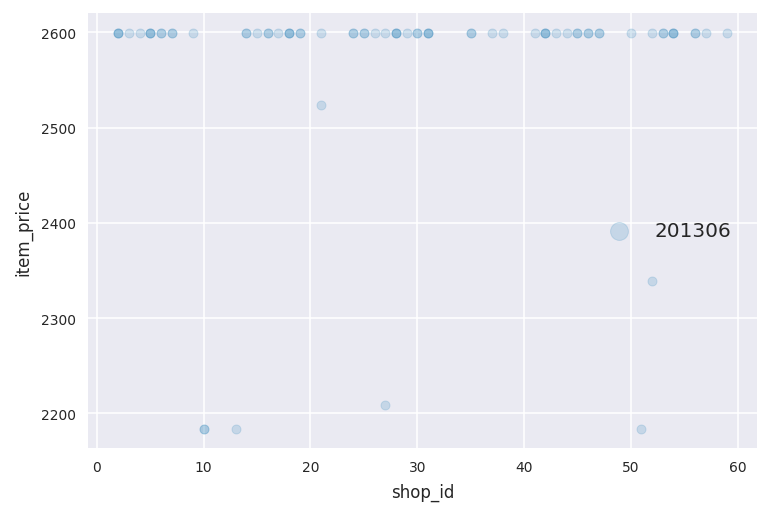

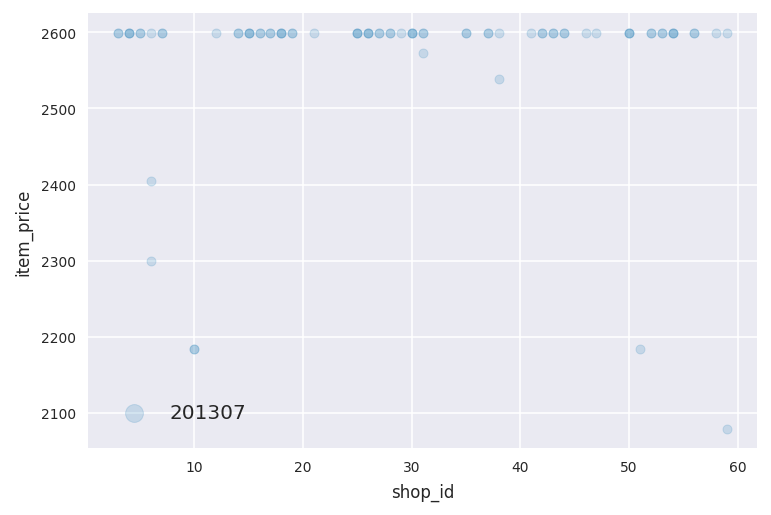

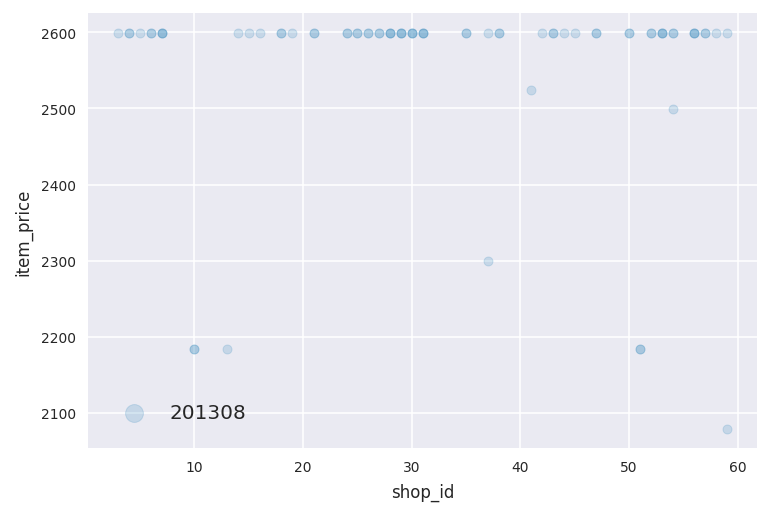

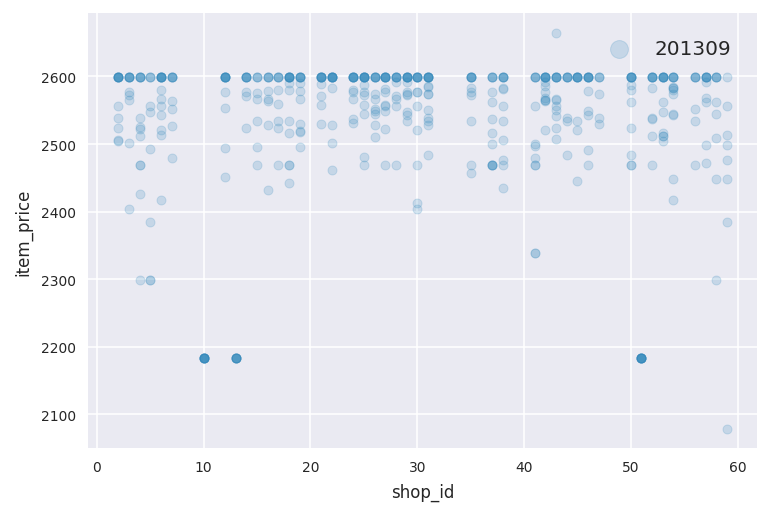

In [73]:
scat_months2(train2,3732)

In [50]:
uniq=sorted(set(train2.YM))[0:1]
    # multiple line plot

for period in uniq:
    print(period)

201301


In [52]:
df2.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,TotalRevenue,Month,Year,YM
933455,933455,2013-01-10,9,44,3732,2599.0,7.0,"Grand Theft Auto V [PS3, русские субтитры]",19,18193.0,1,2013,201301
935150,935150,2013-01-10,9,45,3732,2599.0,4.0,"Grand Theft Auto V [PS3, русские субтитры]",19,10396.0,1,2013,201301
936496,936496,2013-01-10,9,38,3732,2599.0,4.0,"Grand Theft Auto V [PS3, русские субтитры]",19,10396.0,1,2013,201301
938067,938067,2013-01-10,9,41,3732,2599.0,4.0,"Grand Theft Auto V [PS3, русские субтитры]",19,10396.0,1,2013,201301
940037,940037,2013-01-10,9,42,3732,2599.0,6.0,"Grand Theft Auto V [PS3, русские субтитры]",19,15594.0,1,2013,201301


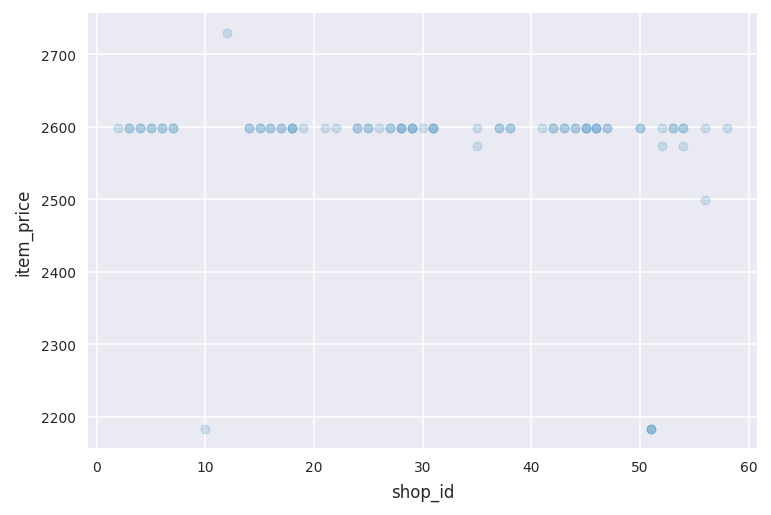

In [54]:
df=train2
df2=df[(df["YM"]==uniq) & (df["item_id"]==3732)]
df2.plot(kind="scatter",x="shop_id",y="item_price", alpha=0.2)


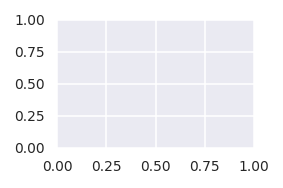

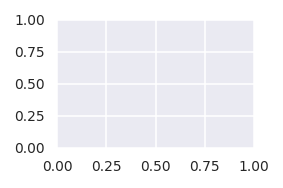

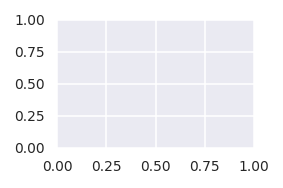

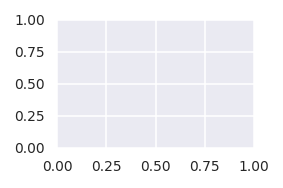

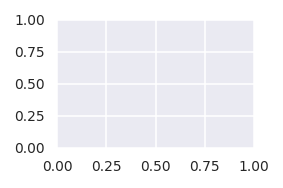

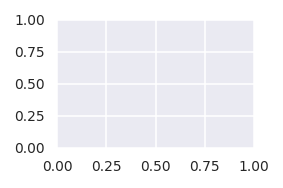

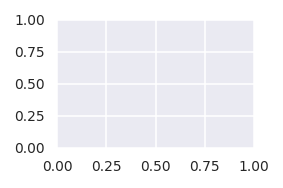

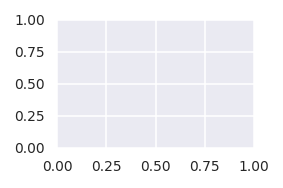

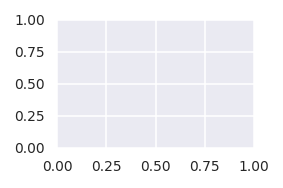

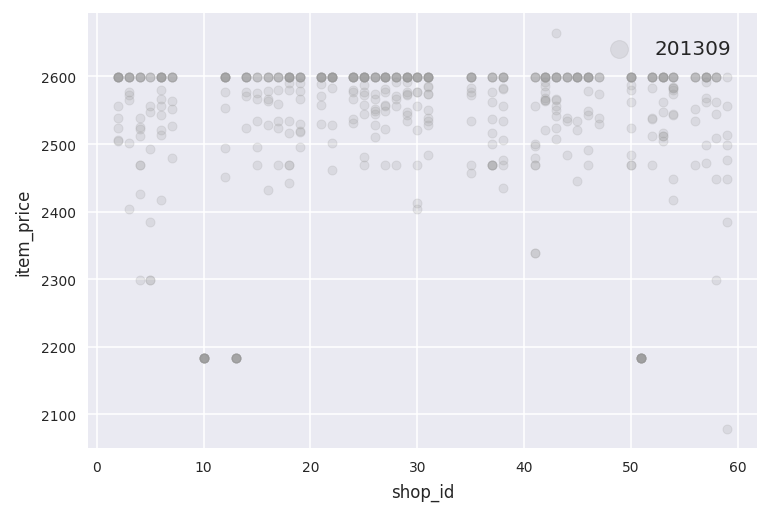

In [58]:
scat_months(train2,3732)

In [30]:
list(set(train2.YM))[0:9]

[201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509]

In [9]:
#create a box plot - with the volume for a weight?  Show the variation - 
#also per month, value that is not the median for that month